In [6]:
import matplotlib.pyplot as plt

# 하늘색 계열로 막대 색상 설정
sky_colors = ['#e0f7fa', '#b2ebf2', '#80deea', '#4dd0e1', '#26c6da', '#00bcd4', '#00acc1', '#0097a7', '#00838f', '#006064']

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color=sky_colors[:len(rating_counts)])
plt.title("리뷰의 평점 분포")
plt.xlabel("리뷰 점수")

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f"{int(height)}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


NameError: name 'rating_counts' is not defined

<Figure size 1000x600 with 0 Axes>

/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2848516350.py:27: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2848516350.py:27: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2848516350.py:27: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2848516350.py:27: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2848516350.py:27: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_98

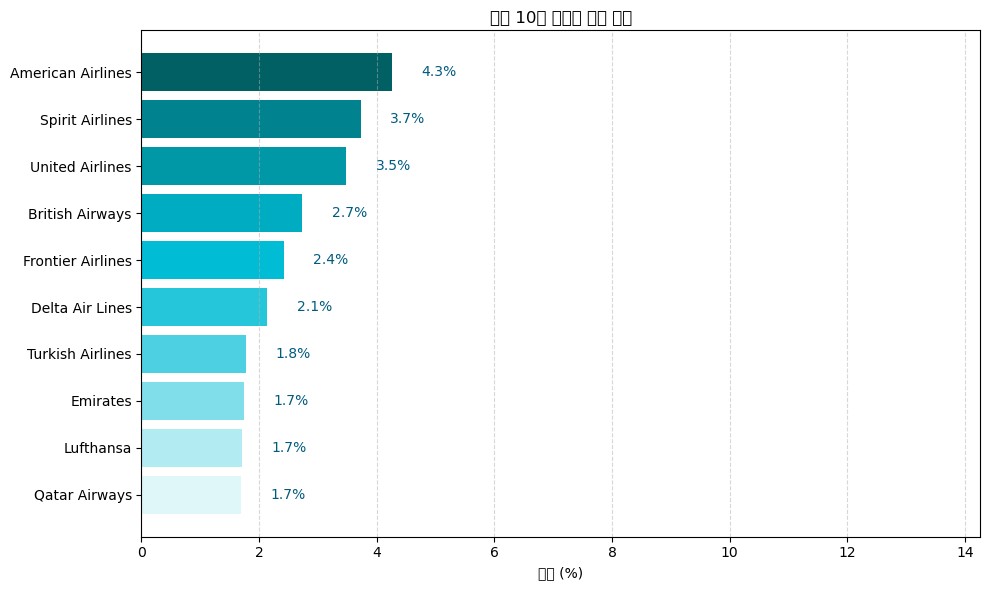

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("AirlineReviews12.csv")

# 상위 10개 항공사 추출 (비율로 변환)
airline_counts = df['AirlineName'].value_counts(normalize=True).head(10) * 100

# 하늘색 계열 색상 리스트
sky_colors = ['#e0f7fa', '#b2ebf2', '#80deea', '#4dd0e1', '#26c6da', 
              '#00bcd4', '#00acc1', '#0097a7', '#00838f', '#006064']

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(airline_counts.index[::-1], airline_counts.values[::-1], color=sky_colors)

# 퍼센트 텍스트 추가
for bar, pct in zip(bars, airline_counts.values[::-1]):
    plt.text(pct + 0.5, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=10, color='#005B7F')

plt.xlabel("비율 (%)")
plt.title("상위 10개 항공사 리뷰 비율")
plt.xlim(0, max(airline_counts.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/1180516484.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/1180516484.py:31: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/1180516484.py:31: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/1180516484.py:31: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/1180516484.py:31: UserWarning: Gl

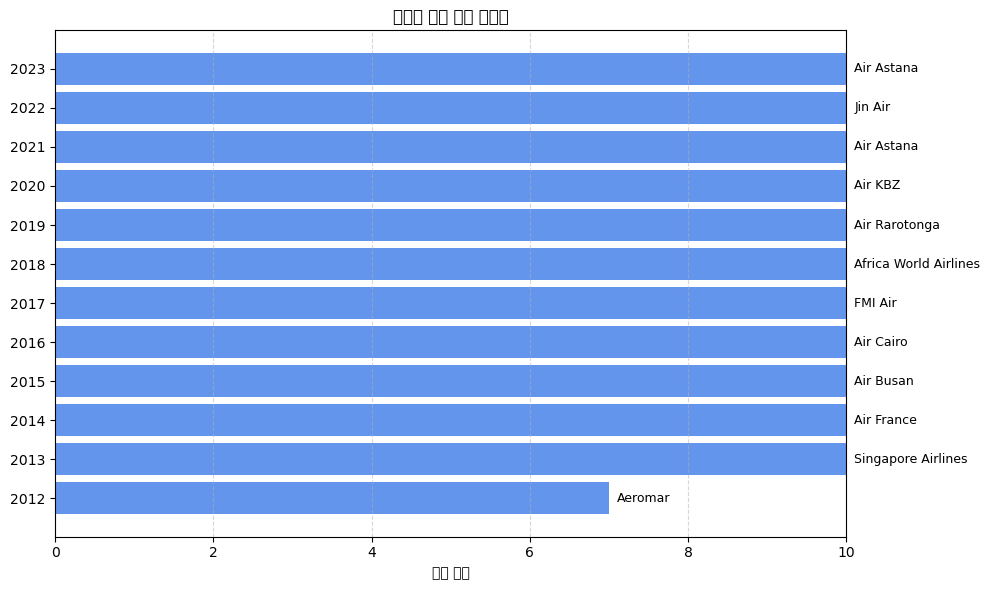

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("AirlineReviews12.csv")

# 날짜 처리
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')
df = df.dropna(subset=['DateFlown'])
df['Year'] = df['DateFlown'].dt.year

# 연도별 항공사 평균 평점 계산
grouped = df.groupby(['Year', 'AirlineName'])['OverallScore'].mean().reset_index()

# 연도별 최고 평점 항공사 선택
top_per_year = grouped.loc[grouped.groupby('Year')['OverallScore'].idxmax()].sort_values('Year')

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(top_per_year['Year'].astype(str), top_per_year['OverallScore'], color='cornflowerblue')

# 항공사 이름 추가
for bar, name in zip(bars, top_per_year['AirlineName']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             name, va='center', fontsize=9)

plt.xlim(0, 10)
plt.xlabel("평균 평점")
plt.title("연도별 최고 평점 항공사")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


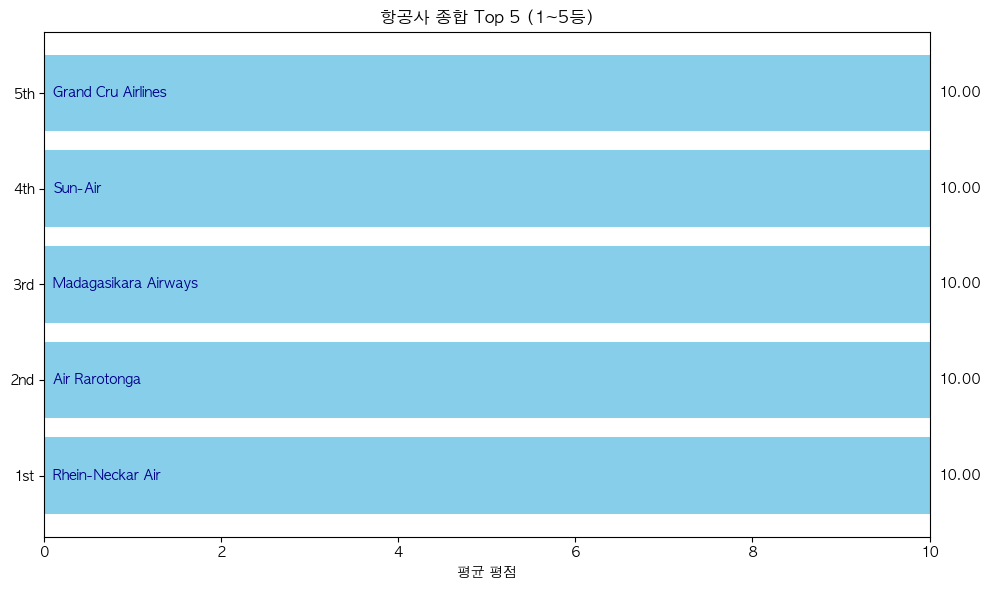

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("AirlineReviews12.csv")

# 항공사별 전체 평점 평균 계산 (예: OverallScore 기준)
top5 = df.groupby("AirlineName")["OverallScore"].mean().sort_values(ascending=False).head(5)

# 한글 폰트 설정 (Windows용 예시)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥은 'AppleGothic', 리눅스는 'NanumGothic'

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.barh(["1st", "2nd", "3rd", "4th", "5th"], top5.values[::-1], color="skyblue")
plt.xlabel("평균 평점")
plt.title("항공사 종합 Top 5 (1~5등)")
plt.xlim(0, 10)

# 값 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center')

# 항공사 이름 주석으로 표기
for i, name in enumerate(top5.index[::-1]):
    plt.text(0.1, i, name, va='center', fontsize=10, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()


/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2078613883.py:38: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2078613883.py:38: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) AppleGothic.
  plt.tight_layout()
/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/2078613883.py:38: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/sit

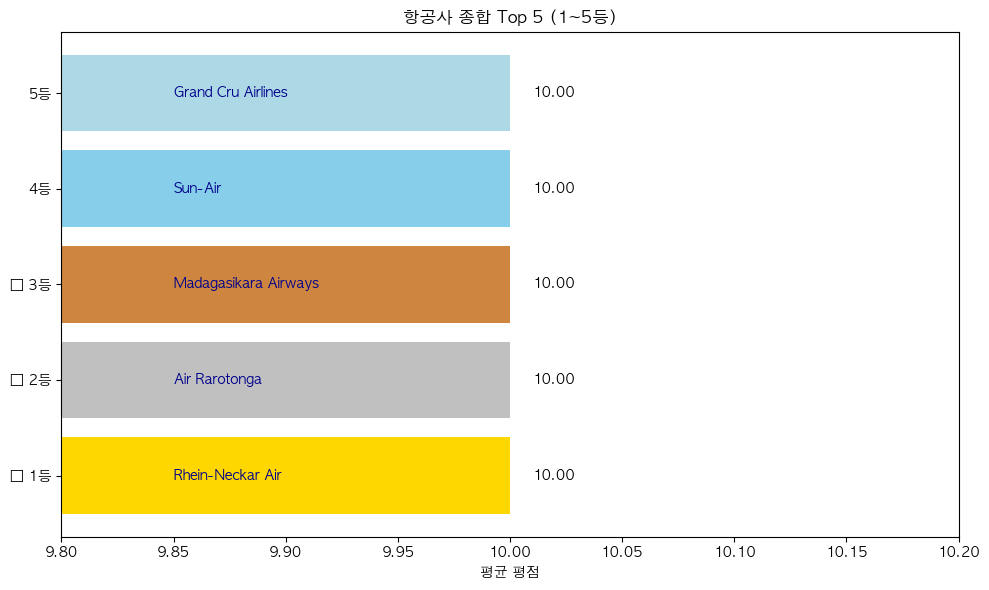

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("AirlineReviews12.csv")

# 상위 5개 항공사 (평균 점수 기준)
top5 = df.groupby("AirlineName")["OverallScore"].mean().sort_values(ascending=False).head(5)

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'AppleGothic'

# 순위 레이블
rank_labels = ["🥇 1등", "🥈 2등", "🥉 3등", "4등", "5등"]

# 색상 지정
colors = ['gold', 'silver', 'peru', 'skyblue', 'lightblue']

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.barh(rank_labels, top5.values[::-1], color=colors)

# x축 범위를 데이터 중심으로 조정
plt.xlim(top5.min() - 0.2, top5.max() + 0.2)
plt.xlabel("평균 평점")
plt.title("항공사 종합 Top 5 (1~5등)")

# 수치 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=10)

# 항공사 이름 옆에 같이 표시
for i, name in enumerate(top5.index[::-1]):
    plt.text(top5.min() - 0.15, i, name, va='center', fontsize=10, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()


/var/folders/3x/kbq5c1tx5ls825qkh87ypb_40000gn/T/ipykernel_9872/3955788663.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top30.values, y=top30.index, palette="viridis")


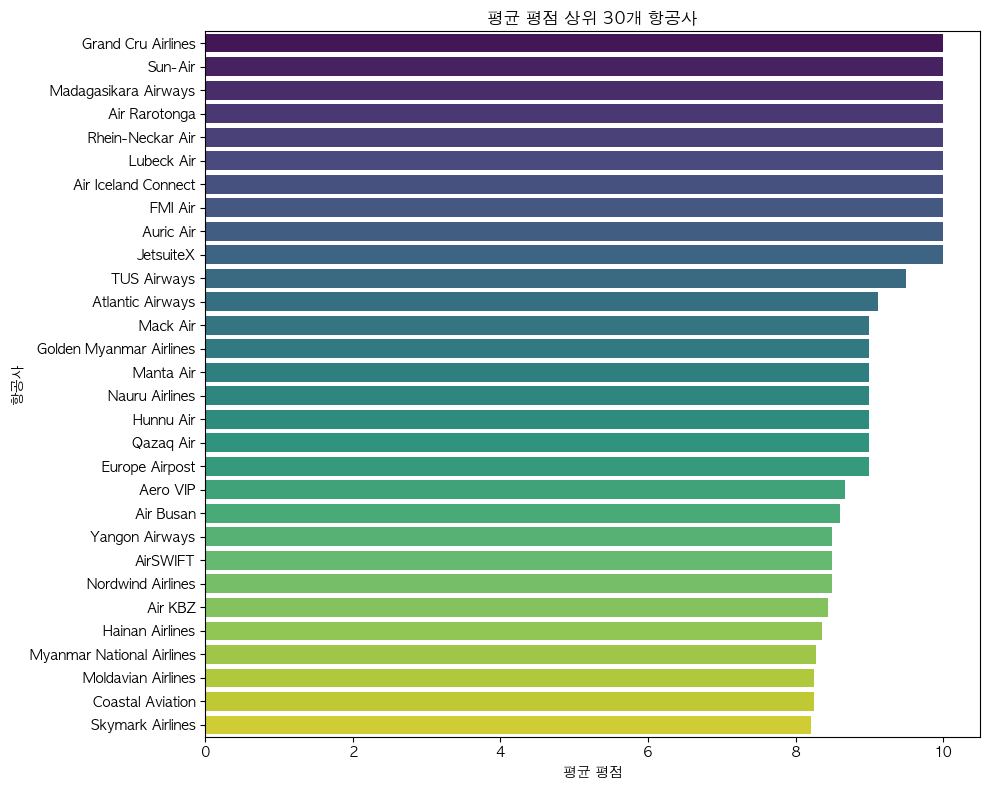

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("AirlineReviews12.csv")

# 평균 평점 상위 30개 항공사
top30 = df.groupby('AirlineName')['OverallScore'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x=top30.values, y=top30.index, palette="viridis")
plt.xlabel("평균 평점")
plt.ylabel("항공사")
plt.title("평균 평점 상위 30개 항공사")
plt.tight_layout()
plt.show()


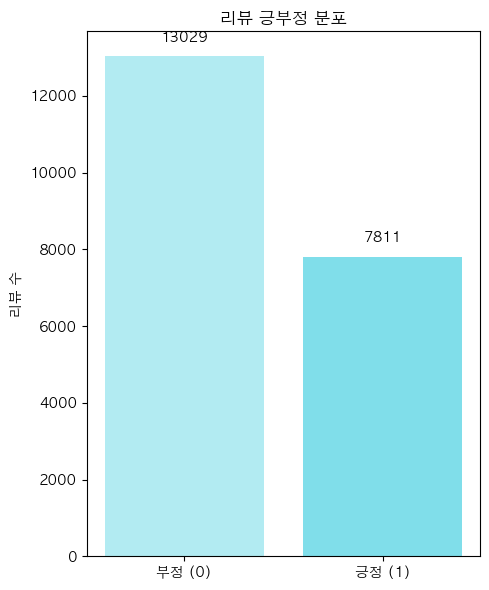

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("AirlineReviews_Eng_1-2vs9-10.csv")

# 레이블 분포 계산 (0: 부정, 1: 긍정)
label_counts = df['label'].value_counts().sort_index()
labels = ['부정 (0)', '긍정 (1)']
colors = ['#b2ebf2', '#80deea']  # 하늘색 계열

# 시각화
plt.figure(figsize=(5, 6))
bars = plt.bar(labels, label_counts.values, color=colors)
plt.title("리뷰 긍부정 분포")
plt.ylabel("리뷰 수")

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


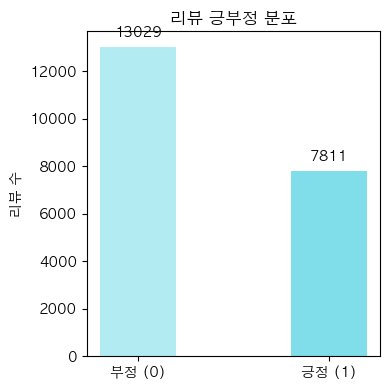

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("AirlineReviews_Eng_1-2vs9-10.csv")

# 레이블 분포 계산
label_counts = df['label'].value_counts().sort_index()
labels = ['부정 (0)', '긍정 (1)']
colors = ['#b2ebf2', '#80deea']

# 시각화
plt.figure(figsize=(4, 4))  # 가로 넓히고 세로 줄이기
bars = plt.bar(labels, label_counts.values, color=colors, width=0.4)  # 막대 너비 조절
plt.title("리뷰 긍부정 분포")
plt.ylabel("리뷰 수")

# 막대 위 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 300, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
